# Traitement des données JFR

à partir du scrapping des entreprises présentes dans le stand AI

In [92]:
import pandas as pd
import requests as re
import matplotlib.pyplot as plt
import pyshs

In [93]:
# Données 2019
table = pd.read_csv("./JFR2019.csv")
table = table.set_index("Name")

In [123]:
def check_site_ia(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    print(url)
    if url =="dead" or pd.isnull(url):
        return None
    kw1 = ["artificial intelligence","intelligence artificielle"]
    kw2 = ["algorithme","algorithm"]
    count1 = 0
    count2 = 0
    site = re.get(url, verify=False, headers=headers)
    txt = site.text
    count1 += txt.count("AI")
    count1 += txt.count("IA")
    txt = txt.lower()
    for i in kw1:
        count1 +=txt.count(i)
    
    for i in kw2:
        count2 +=txt.count(i)
    return (count1,count2)

In [133]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
url = "https://www.sophiagenetics.com/"
site = re.get(url, verify=False, headers=headers)
check_site_ia("https://www.sophiagenetics.com/")

https://www.sophiagenetics.com/


(14, 0)

In [124]:
import warnings
warnings.filterwarnings("ignore")
table["page"] = table["Site"].apply(check_site_ia)

http://www.biomediqa.com
https://www.carestream.com/fr/fr/
https://www.casis.fr/ 
http://www.cfigroupe.com
https://www.guerbet.com/fr-fr
https://www.icadmed.com/
https://incepto-medical.com/ 
https://keydiag.org/
https://nehs.com/mnhgroup-solutions/digital 
http://www.opale.pro
http://www.osimis.io
https://oxipit.ai/
dead
https://avicenna.ai/
https://azmed.co
https://www.gleamer.ai
https://www.medexprim.com/
https://milvue.com/
dead
https://www.nurea-soft.com/
https://pixyl.ai/
https://brainanalyze.com/
https://www.easydoct.com/
https://medical.sectra.com/about-sectra/regional-presence/sectra-en-france/
https://www.siemens-healthineers.com/fr
https://www.newtom.it/fr/medicale/
https://www.smart-reporting.com/en/
https://www.softwaymedical.fr/
https://www.sophiagenetics.com/
https://www.terarecon.com/
https://www.therapixel.com/
https://www.verso.healthcare/


In [97]:
table["Type"].value_counts()

specific      20
generalist    12
Name: Type, dtype: int64

On retrouve une diversité d'entreprises

Text(0.5, 1.0, 'Année de création des entreprises présentes en 2019 au JFR - section IA')

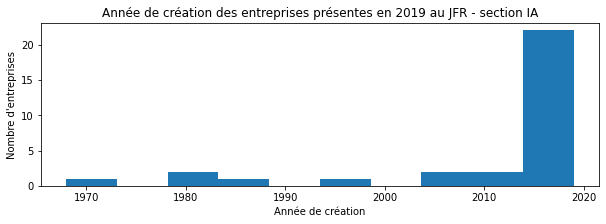

In [131]:
table["Année création"].hist(figsize=(10,3),bins=10)
plt.grid(False)
plt.xlabel("Année de création")
plt.ylabel("Nombre d'entreprises")
plt.title("Année de création des entreprises présentes en 2019 au JFR - section IA")

In [128]:
table["kw"] = table["page"].apply(lambda x : sum(x) if pd.notnull(x) else 0)
table["Mentionne IA site"] = table["page"].apply(lambda x : x[0]>0 if pd.notnull(x) else False)
table["kw_b"] = table["kw"]>0

table.sort_values("Couverture presse",ascending=False)[["Année création","Type","Couverture presse","Mentionne IA site"]]

,Année création,Type,Couverture presse,Mentionne IA site
Name,,,,
THERAPIXEL,2013.0,specific,18.0,True
Siemens Healthineers,2015.0,generalist,15.0,True
GUERBET,1968.0,generalist,7.0,True
INCEPTO,2018.0,specific,6.0,True
SOPHiA GENETICS,2014.0,specific,5.0,True
GLEAMER,2017.0,specific,5.0,True
CASIS Cardiac Simulation & Imaging Sotfware,2016.0,specific,3.0,True
AZMED,2018.0,specific,2.0,True
TERARECON,1997.0,generalist,2.0,True
